In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

seed=42

# Examine Marginals for Iris Dataset

In [2]:
dataset = pd.read_csv('iris.data', header=None, names=['sepal length', 'sepal width',
                                                     'petal length', 'petal width',
                                                     'class'])

In [3]:
#Assign label to each class
dataset.loc[dataset['class'] == 'Iris-setosa', dataset.columns == 'class'] = 0
dataset.loc[dataset['class'] == 'Iris-versicolor', dataset.columns == 'class'] = 1
dataset.loc[dataset['class'] == 'Iris-virginica', dataset.columns == 'class'] = 2

In [4]:
# train/test split
train_test_split = 0.8

# Shuffle and split data into training 80% and testing 20%
train_set = dataset.sample(frac=train_test_split, random_state=seed)
test_set = dataset.drop(train_set.index)
train_set.reset_index(drop=True, inplace=True)
test_set.reset_index(drop=True, inplace=True)

X_train = train_set.iloc[:,:-1].to_numpy()
y_train = train_set.iloc[:,-1].to_numpy().astype('int')
X_test = test_set.iloc[:,:-1].to_numpy()
y_test = test_set.iloc[:,-1].to_numpy().astype('int')


In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [6]:
nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test).reshape(-1,1)
y_prob = nb.predict_proba(X_test)

In [7]:
maxprobs = np.max(y_prob,axis=1)
maxprobs

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.5052736 , 0.99999982, 0.99059606,
       0.9997963 , 0.99843045, 0.99925056, 0.99982903, 0.9998983 ,
       0.9910551 , 0.99996625, 0.99986092, 0.99999924, 0.99534987,
       0.98589516, 0.99999641, 0.9959176 , 0.95708665, 0.99999555,
       0.99881206, 0.99999744, 0.99999994, 1.        , 0.88513258])

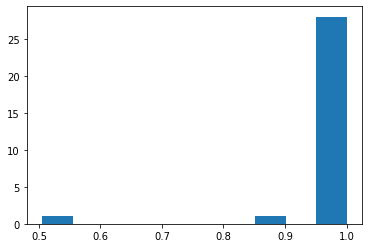

In [8]:
plt.hist(maxprobs);

# Examine Marginals for Diabetes Dataset

In [9]:
# acquire the ionosphere dataset and sanity check
ionosphere = np.genfromtxt('pima-indians-diabetes.csv', delimiter=',')
ion_X = ionosphere[:,:-1]
ion_y = np.array(ionosphere[:,-1],dtype='int')
ion_labels = np.unique(ion_y)

print('shape of ionosphere features/labels: ', ion_X.shape, ion_y.shape)
print('eyeball first few feature rows...')
print(ion_X[:3])
print('eyeball first few label rows...')
print(ion_y[:3], 'unique labels ', ion_labels)

shape of ionosphere features/labels:  (768, 8) (768,)
eyeball first few feature rows...
[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]]
eyeball first few label rows...
[1 0 1] unique labels  [0 1]


In [32]:
dataset = pd.read_csv('pima-indians-diabetes2.csv')
dataset

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [18]:
bagcls = BaggingClassifier(base_estimator=GaussianNB(),n_estimators=1,random_state=seed)
bagcls.fit(X_train,y_train)
y_pred = bagcls.predict(X_test).reshape(-1,1)
y_prob = bagcls.predict_proba(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       103
           1       0.65      0.60      0.63        50

    accuracy                           0.76       153
   macro avg       0.73      0.72      0.73       153
weighted avg       0.76      0.76      0.76       153



In [19]:
bagcls = BaggingClassifier(base_estimator=GaussianNB(),n_estimators=100,random_state=seed)
bagcls.fit(X_train,y_train)
y_pred = bagcls.predict(X_test).reshape(-1,1)
y_prob = bagcls.predict_proba(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       103
           1       0.70      0.60      0.65        50

    accuracy                           0.78       153
   macro avg       0.76      0.74      0.75       153
weighted avg       0.78      0.78      0.78       153



In [66]:
bagcls.score(X_test,y_test)

0.7712418300653595